# Linear Regression Explained

Linear Regression is a foundational statistical method used in machine learning for predicting a quantitative response. It's based on the relationship between independent variables (or features) and a dependent variable (or target), assuming that this relationship is linear. Linear regression models the relationship by fitting a linear equation to observed data. Let's delve into how linear regression works, using some mathematical formulations for clarity.

## Concept

Imagine you are looking at the relationship between the hours studied and the scores obtained in an exam. Linear regression would help you predict the exam score based on the number of hours studied, assuming there's a linear relationship between these two variables.

## Steps

1. **Model Selection**: Choose a linear model to represent the relationship between the dependent variable (Y) and one or more independent variables (X).

2. **Estimate Model Parameters**: Use the training data to estimate the parameters (the slope and intercept) of the linear model.

3. **Predictions**: With the model parameters, predict the value of Y for any given value of X.

## Mathematical Formulation

The simplest form of linear regression is a straight-line fit to data, known as simple linear regression, represented by the equation:

$$Y = \beta_0 + \beta_1X + \epsilon$$

Where:

- $Y$ is the dependent variable (e.g., exam score),
- $X$ is the independent variable (e.g., hours studied),
- $\beta_0$ is the y-intercept of the line,
- $\beta_1$ is the slope of the line, indicating the change in Y for a one-unit change in X,
- $\epsilon$ is the error term, representing the difference between the observed values and the values predicted by the model.

In multiple linear regression, where there are multiple independent variables, the equation extends to:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$$

## Estimation of Parameters

The parameters $\beta_0$ and $\beta_1$ (and others in multiple regression) are estimated using the least squares criterion, which finds the line that minimizes the sum of the squared differences between the observed values and the values predicted by the model.

## Simple Example

Suppose we have data on hours studied (X) and exam scores (Y). We want to fit a linear regression model to predict exam scores based on hours studied.

- After calculating or estimating $\beta_0$ and $\beta_1$ using the least squares method, we might find an equation like: $Y = 50 + 5X$. This equation suggests that, on average, the exam score increases by 5 points for each additional hour studied, starting from a base score of 50 when no hours are studied.

## Key Points

- **Interpretation of Parameters**: In the equation $Y = \beta_0 + \beta_1X$, $\beta_1$ represents the average change in Y associated with a one-unit increase in X, holding all else constant.

- **Assumptions**: Linear regression assumes a linear relationship between X and Y, independence of errors, homoscedasticity (constant variance of error terms), and normality of error distribution.

- **Applications**: Linear regression is widely used in forecasting, time series analysis, and any domain requiring the prediction of a quantitative variable.

Linear Regression is a powerful tool for understanding and predicting behaviors in various fields, from economics to machine learning, due to its simplicity and interpretability.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [4]:
import codecs

dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

# Open the file in binary mode and decode using the correct encoding
with codecs.open("SeoulBikeData.csv", "r", encoding="cp949") as f:
    df = pd.read_csv(f)

# Drop unwanted columns
df = df.drop(["Date", "Holiday", "Seasons"], axis=1)

In [5]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [6]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


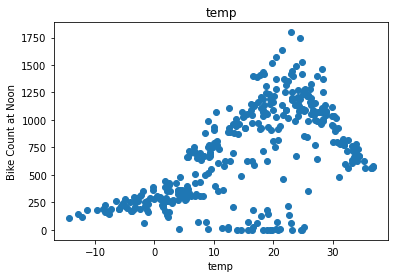

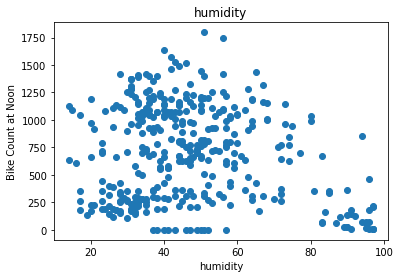

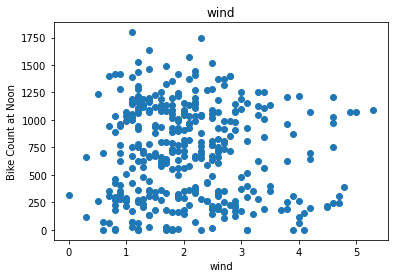

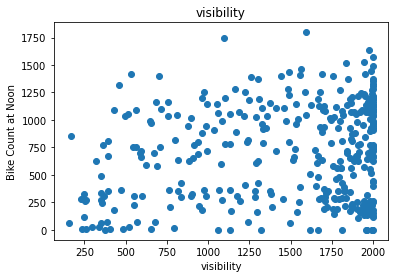

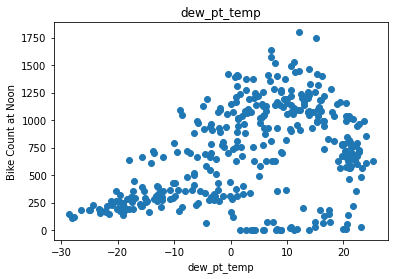

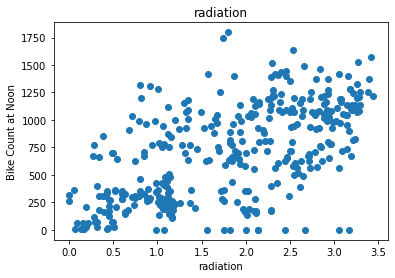

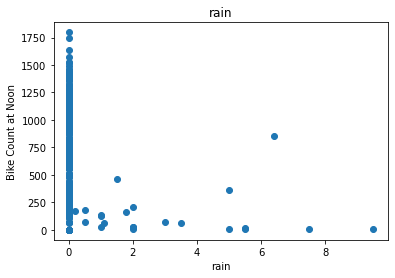

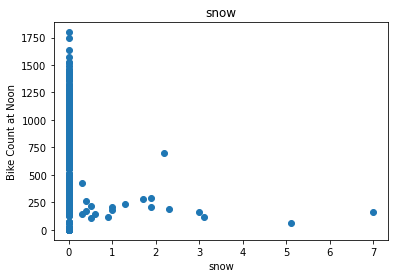

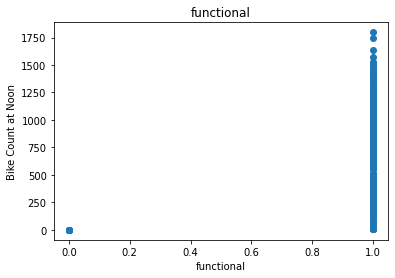

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [8]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [9]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/valid/test dataset

In [10]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [12]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [13]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [14]:
temp_reg.score(X_test_temp, y_test_temp)

0.23897842104135858

2024-04-04 17:50:13.480686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-04 17:50:13.481428: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



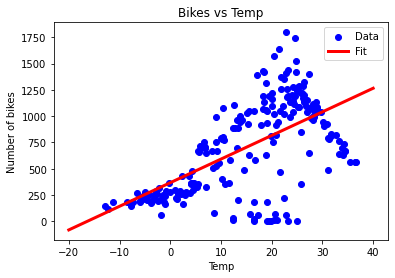

In [15]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression (MLR)

## Concept

Multiple Linear Regression (MLR) extends the concept of simple linear regression by allowing for multiple independent variables to be included in the model, rather than just one. This enables us to account for the potential influence of several predictors on the dependent variable.

Imagine you are predicting house prices based on various factors such as area, number of bedrooms, and location. Multiple Linear Regression would allow you to incorporate all these factors into your prediction model.

## Steps

1. **Model Selection**: Choose a linear model that includes multiple independent variables to represent the relationship with the dependent variable.

2. **Estimate Model Parameters**: Use the training data to estimate the parameters (coefficients) of the linear model, including the intercept and slopes for each independent variable.

3. **Predictions**: With the model parameters, predict the value of the dependent variable for any given combination of independent variables.

## Mathematical Formulation

In Multiple Linear Regression, the equation takes the form:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$$

Where:

- $Y$ is the dependent variable.
- $X_1, X_2, ..., X_n$ are the independent variables.
- $\beta_0$ is the intercept term.
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients (slopes) corresponding to each independent variable.
- $\epsilon$ is the error term.

The equation represents a linear relationship between the dependent variable and multiple independent variables.

## Estimation of Parameters

Similar to simple linear regression, the parameters $\beta_0, \beta_1, ..., \beta_n$ are estimated using the least squares method, aiming to minimize the sum of squared differences between the observed values and the values predicted by the model.

## Interpretation of Parameters

Each $\beta$ coefficient represents the change in the dependent variable associated with a one-unit change in the corresponding independent variable, holding all other variables constant. For example, if $\beta_1$ is 3, it means that for every one-unit increase in $X_1$, the dependent variable $Y$ is expected to increase by 3 units, assuming all other variables remain constant.

## Assumptions

Multiple Linear Regression shares assumptions with simple linear regression, including linearity, independence of errors, homoscedasticity, and normality of error distribution. Additionally, it assumes that the independent variables are not highly correlated with each other (i.e., no multicollinearity).

## Applications

MLR is widely used in various fields such as economics, finance, social sciences, and machine learning for predictive modeling, understanding relationships between variables, and making forecasts based on multiple predictors.

## Key Points

- MLR allows us to capture the combined influence of multiple predictors on the dependent variable.
- Interpretation of coefficients in MLR involves considering the effects of each independent variable while holding others constant.
- Model diagnostics and checking assumptions are crucial to ensure the validity of the MLR model.

Multiple Linear Regression provides a flexible framework for modeling complex relationships between variables and is a fundamental tool in statistical analysis and predictive modeling.

In [16]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [17]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [18]:
all_reg.score(X_test_all, y_test_all)

0.5057442575469828

In [19]:
y_pred_lr = all_reg.predict(X_test_all)

In [20]:
y_pred_lr

array([[ 164.42543865],
       [ 718.27815312],
       [ 899.29789341],
       [ 400.53477398],
       [ 886.26627002],
       [1025.03831988],
       [ 685.8202594 ],
       [ 816.09556542],
       [ -61.41448703],
       [ 314.91698151],
       [ 467.23089252],
       [ 983.81839845],
       [ 620.86344561],
       [1166.41434455],
       [ 734.34072446],
       [ 282.31776916],
       [ 934.93165995],
       [ 539.75442692],
       [1004.60108388],
       [ 928.7891065 ],
       [ 594.17736218],
       [ 418.896848  ],
       [ 923.88220802],
       [ 705.69629026],
       [ 711.13396019],
       [ 774.73525574],
       [ 683.50415731],
       [ 951.95867637],
       [ 494.04244218],
       [ 806.0932307 ],
       [ 385.43962913],
       [ 755.8526194 ],
       [ 561.17476436],
       [1036.82437045],
       [  47.33894023],
       [ 483.84671029],
       [ 256.66100448],
       [ 975.16788646],
       [1102.79473353],
       [ 217.51256082],
       [ 393.18320755],
       [1009.149

Here is the information in Markdown format:

# Regression with Neural Networks

## Concept

Regression with Neural Networks, also known as Neural Network Regression, is a powerful approach to regression analysis that utilizes artificial neural networks to model and predict continuous target variables. Neural networks excel at capturing complex relationships between input features and output targets, making them suitable for a wide range of regression tasks.

## Steps

1. **Data Preprocessing**: Prepare the dataset by scaling features, handling missing values, and splitting data into training and testing sets.

2. **Neural Network Architecture**: Design the architecture of the neural network, including the number of layers, the number of neurons in each layer, and the activation functions.

3. **Model Training**: Train the neural network using the training data. During training, the network adjusts its weights and biases to minimize the difference between the predicted outputs and the actual targets.

4. **Model Evaluation**: Evaluate the performance of the trained model on the testing data using appropriate metrics such as mean squared error (MSE), mean absolute error (MAE), or coefficient of determination ($R^2$).

5. **Prediction**: Use the trained model to make predictions on new data.

## Neural Network Architecture

A typical neural network architecture for regression consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of neurons (also called nodes) that perform computations and pass their outputs to the next layer. The number of neurons in the input layer corresponds to the number of input features, while the number of neurons in the output layer is typically one for regression tasks.

## Mathematical Formulation

The mathematical formulation of a neural network involves computing the activations of neurons in each layer through a series of matrix multiplications and applying activation functions. The output of the neural network is calculated as the weighted sum of the inputs plus a bias term, followed by an activation function:

$$
\text{Output} = f(\sum_{i=1}^{n} w_i x_i + b)
$$

where:

- $f$ is the activation function.
- $w_i$ are the weights connecting the neurons in the previous layer to the current neuron.
- $x_i$ are the inputs to the current neuron.
- $b$ is the bias term.

## Training

Training a neural network involves iteratively adjusting the weights and biases using an optimization algorithm such as stochastic gradient descent (SGD) or Adam optimization. The goal is to minimize a loss function that quantifies the difference between the predicted outputs and the actual targets.

## Applications

Neural network regression is used in various domains such as finance (e.g., stock price prediction), healthcare (e.g., disease prognosis), and engineering (e.g., predictive maintenance). It is also widely employed in machine learning applications for tasks like time series forecasting, anomaly detection, and recommendation systems.

## Key Points

- Neural network regression can capture nonlinear relationships between input features and output targets.
- Model architecture, hyperparameters, and optimization algorithm selection significantly impact the performance of the neural network.
- Neural networks require sufficient data for training and may be computationally intensive, especially for large datasets and complex architectures.

Regression with Neural Networks offers a flexible and scalable approach to regression analysis, capable of handling high-dimensional data and learning complex patterns in the data.

In [21]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [22]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

2024-04-04 17:50:14.428569: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-04 17:50:14.547413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:50:14.573744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [23]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [24]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [25]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

2024-04-04 17:50:41.343568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:50:45.372517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


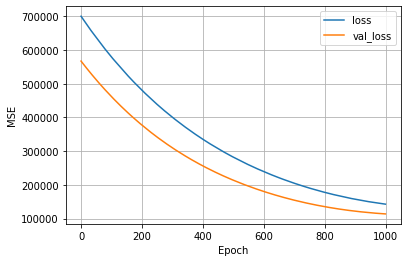

In [26]:
plot_loss(history)

2024-04-04 17:51:46.321669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


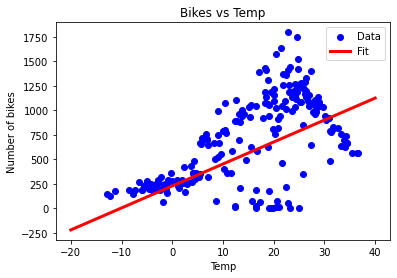

In [27]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()